In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import math
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from utils.utils import DataHandling, FeatureRecipe, FeatureExtractor

In [2]:
dh = DataHandling()

DataHandling intialization
Intialization done !


In [208]:
dh.get_data()

Loading data from local file...
Dataset shape : 11914 lines, 16 columns
Data loaded from local file !


In [209]:
ftr = FeatureRecipe(dh.data)
ftr.prepare_data(0.3)

FeatureRecipe intialization...
Initialization done !
Dropping useless features and observations...
Useless features and observations dropped !

Dropping features with more than 30.0 % NaN...
Dropped 0 features.

Separating features by type...
Dataset columns : 15 
Number of discrete features : 5 
Number of continuous features : 3 
Number of categorical features : 7 
Total number of features : 15

Processed dataset shape : 8206 lines, 16 columns
FeatureRecipe processing done !



### Séparation du dataset
Le dataset est divisé en 2, un dataset d'entrainement et un dataset de test. La majorité des observation sera utilisée pour l'entrainement, et la petite partie restante sera utilisée pour le test. 

In [264]:
df=ftr.data.copy()

x = df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = df['Price'].values

print(x.shape)
print(y.shape)

(8206, 6)
(8206,)


In [265]:
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [266]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5744, 6)
(5744, 1)
(2462, 6)
(2462, 1)


In [267]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc.score(x_train,y_train))
print("Testing Accuracy :",rfc.score(x_test,y_test))

<ipython-input-267-0b9a362da5ae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


Training Accuracy : 0.9697666904224956
Testing Accuracy : 0.9356943931702617


In [268]:
y_pred = rfc.predict(x_test)

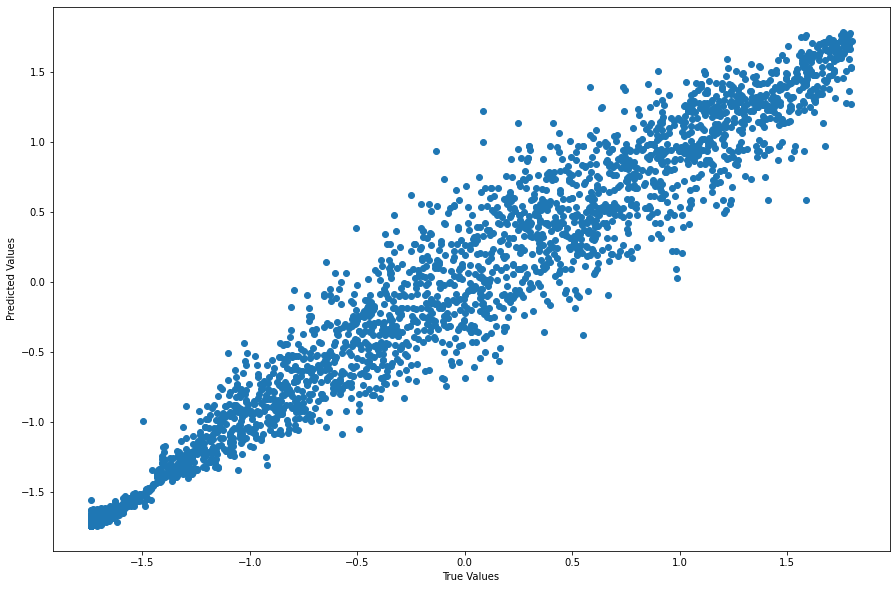

In [269]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values");

C:\Users\GAMER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


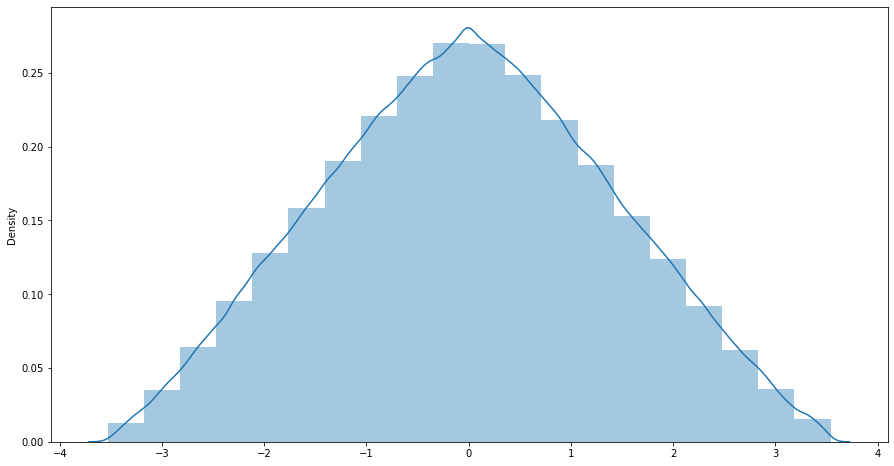

In [252]:
plt.figure(figsize=(15, 8))
sns.distplot((y_test-y_pred),bins=20);

In [270]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Root Mean Square Error : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.9356943931702617
Mean Squared Error :  0.06537540358961733
Mean Absolute Error :  0.18862118789960008
Root Mean Square Error :  0.25568614274069945


In [271]:
feature_list = list(ftr.data[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].columns)
importances = list(rfc.feature_importances_)
feature_importances = [(feature,round(importance,3)) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: HP                   Importance: 0.693
Variable: Year                 Importance: 0.165
Variable: Popularity           Importance: 0.077
Variable: MPG-H                Importance: 0.039
Variable: MPG-C                Importance: 0.019
Variable: Cylinders            Importance: 0.006


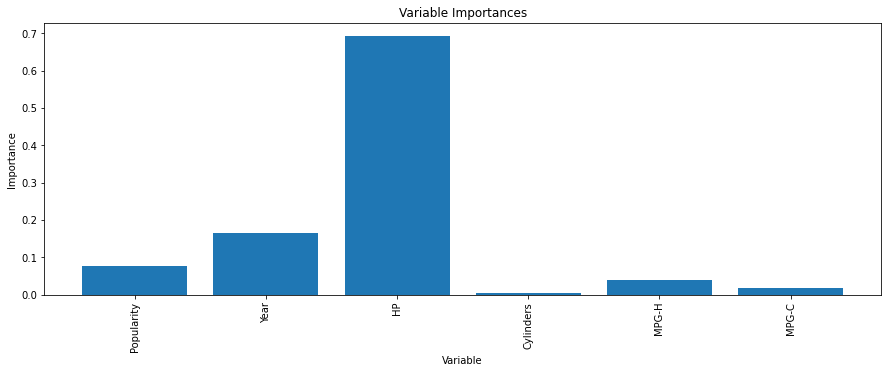

In [278]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart

plt.figure(figsize=(15,5))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [273]:
rfc_model_most_important=RandomForestRegressor(n_estimators=50,random_state=42)

important_features = [feature_list.index('HP'), feature_list.index('Year'), feature_list.index('Popularity')]
x_important_train = x_train[: , important_features]
x_important_test = x_test[: , important_features]

rfc_model_most_important.fit(x_important_train,y_train)

y_important_pred=rfc_model_most_important.predict(x_important_test)

print("R2_Score : ", r2_score(y_test,y_important_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_important_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_important_pred))
print("Root Mean Square Error : ",math.sqrt(mean_squared_error(y_test,y_important_pred)))

<ipython-input-273-1ff02cd5c6a8>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model_most_important.fit(x_important_train,y_train)


R2_Score :  0.9276306888092755
Mean Squared Error :  0.07357325682537975
Mean Absolute Error :  0.20103003881315645
Root Mean Square Error :  0.2712439065221185


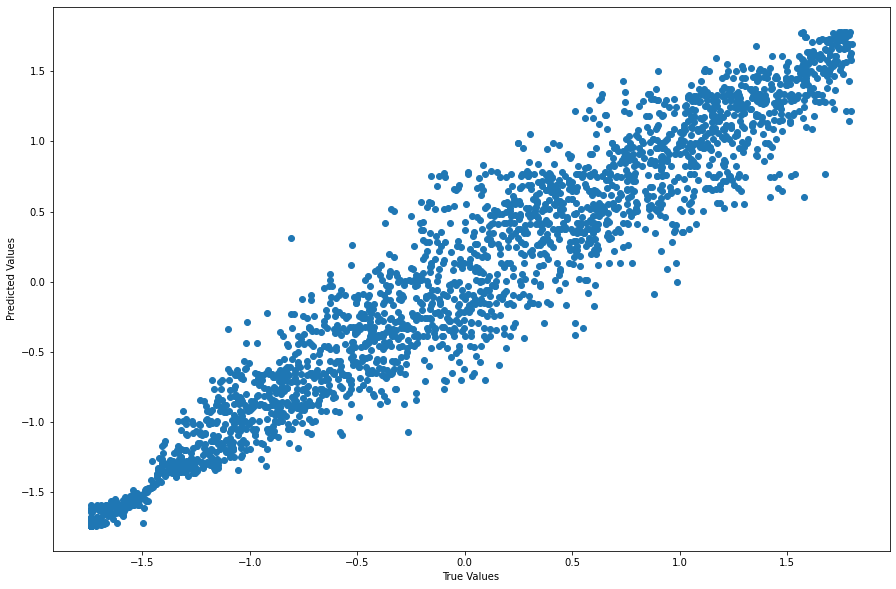

In [276]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_important_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values");

C:\Users\GAMER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


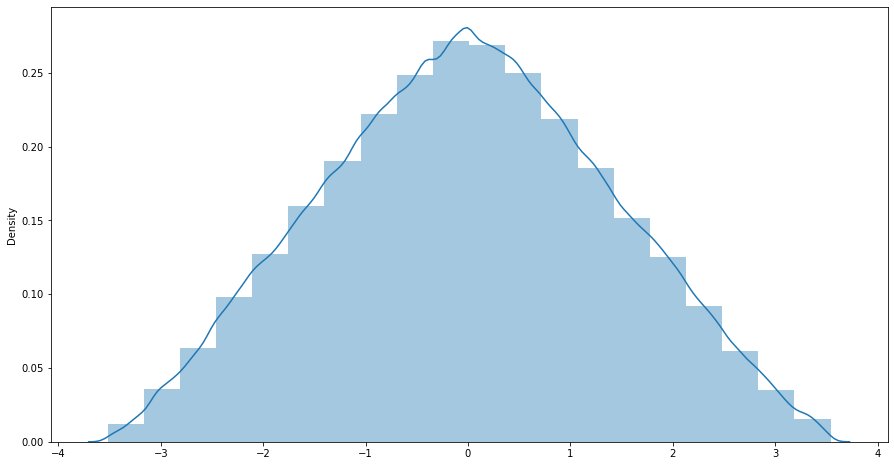

In [277]:
plt.figure(figsize=(15, 8))
sns.distplot((y_test-y_important_pred),bins=20);